
# import data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
data = pd.read_excel("/content/drive/MyDrive/machine learning/naive bayes/dataset/prostitusi_dataset.xlsx")
data = pd.DataFrame(data["message"])

In [6]:
data.head()

,message
0,"Selamat kembali keMiChat, Kami dari Tim MiChat..."
1,test
2,Saya BF
3,Di atas adalah salam
4,Anda telah menambahkan BF. Mulai mengobrol sek...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  904 non-null    object
dtypes: object(1)
memory usage: 7.2+ KB


In [8]:
print(data.isnull().values.any())

False


# Labeling

In [9]:
kamus_bully_protitusi = pd.read_csv("/content/drive/MyDrive/machine learning/naive bayes/dataset/kamus_protitusi.csv")
kamus_prostitusi = kamus_bully_protitusi['PROSTITUSI'].tolist()
#negative/0 = prostitusi
#positive/1 = tidak prostitusi
def deteksi_prostitusi(message, terms):
    if any(term.lower() in message.lower() for term in terms):
        return 'Negative'
    else:
        return 'Positive'

data.loc[:, 'label'] = data['message'].apply(lambda x: deteksi_prostitusi(x, kamus_prostitusi))

In [10]:
data.head()

,message,label
0,"Selamat kembali keMiChat, Kami dari Tim MiChat...",Negative
1,test,Positive
2,Saya BF,Positive
3,Di atas adalah salam,Positive
4,Anda telah menambahkan BF. Mulai mengobrol sek...,Positive


In [11]:
data['label'].value_counts()

,count
label,
Negative,454
Positive,450


In [12]:
data.to_excel('/content/drive/MyDrive/machine learning/naive bayes/data_labeling.xlsx', index=False)

# Preprocessing

In [13]:
import nltk
import re
import pandas as pd
from nltk import word_tokenize
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


In [14]:
data_labeling = pd.read_excel("/content/drive/MyDrive/machine learning/naive bayes/data_labeling.xlsx")

In [15]:
data_labeling.head()

,message,label
0,"Selamat kembali keMiChat, Kami dari Tim MiChat...",Negative
1,test,Positive
2,Saya BF,Positive
3,Di atas adalah salam,Positive
4,Anda telah menambahkan BF. Mulai mengobrol sek...,Positive


In [16]:
#cleaning
def clean_tweet_text(text):
    text = text.strip(" ") #hapus spasi awal dan akhir
    text = re.sub(r'[^\w\s]', '', text) #hapus tanda baca
    text = re.sub(r'[-+]?[0-9]+', '',text) #hapus angka
    return text

#data['cleaning'] = data['message'].apply(clean_tweet_text)
data_labeling.loc[:, 'cleaning'] = data_labeling['message'].apply(clean_tweet_text)
data_labeling.head(10)

,message,label,cleaning
0,"Selamat kembali keMiChat, Kami dari Tim MiChat...",Negative,Selamat kembali keMiChat Kami dari Tim MiChat ...
1,test,Positive,test
2,Saya BF,Positive,Saya BF
3,Di atas adalah salam,Positive,Di atas adalah salam
4,Anda telah menambahkan BF. Mulai mengobrol sek...,Positive,Anda telah menambahkan BF Mulai mengobrol seka...
5,Mohon untuk tidak mengungkapkan nomor ponsel ...,Positive,Mohon untuk tidak mengungkapkan nomor ponsel ...
6,test 2,Positive,test
7,Mau bo?,Negative,Mau bo
8,berapa tarif?,Negative,berapa tarif
9,pijat sama bo 700,Negative,pijat sama bo


In [17]:
def case_folding(text):
    text = text.lower()
    return text

data_labeling['case_folding'] = data_labeling['cleaning'].apply(case_folding)

data_labeling.head(10)

,message,label,cleaning,case_folding
0,"Selamat kembali keMiChat, Kami dari Tim MiChat...",Negative,Selamat kembali keMiChat Kami dari Tim MiChat ...,selamat kembali kemichat kami dari tim michat ...
1,test,Positive,test,test
2,Saya BF,Positive,Saya BF,saya bf
3,Di atas adalah salam,Positive,Di atas adalah salam,di atas adalah salam
4,Anda telah menambahkan BF. Mulai mengobrol sek...,Positive,Anda telah menambahkan BF Mulai mengobrol seka...,anda telah menambahkan bf mulai mengobrol seka...
5,Mohon untuk tidak mengungkapkan nomor ponsel ...,Positive,Mohon untuk tidak mengungkapkan nomor ponsel ...,mohon untuk tidak mengungkapkan nomor ponsel ...
6,test 2,Positive,test,test
7,Mau bo?,Negative,Mau bo,mau bo
8,berapa tarif?,Negative,berapa tarif,berapa tarif
9,pijat sama bo 700,Negative,pijat sama bo,pijat sama bo


In [18]:
#normalisasi kata
key_norm = pd.read_csv('/content/drive/MyDrive/machine learning/naive bayes/dataset/key_norm.csv')

def text_normalize(text):
    text =' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0]
    if (key_norm['singkat'] == word).any()
    else word for word in text.split()
    ])

    text = str.lower(text)
    return text

data_labeling['normalization'] = data_labeling['cleaning'].apply(lambda x:text_normalize(x))

data_labeling.head(10)

,message,label,cleaning,case_folding,normalization
0,"Selamat kembali keMiChat, Kami dari Tim MiChat...",Negative,Selamat kembali keMiChat Kami dari Tim MiChat ...,selamat kembali kemichat kami dari tim michat ...,selamat kembali kemichat kami dari tim michat ...
1,test,Positive,test,test,test
2,Saya BF,Positive,Saya BF,saya bf,saya bf
3,Di atas adalah salam,Positive,Di atas adalah salam,di atas adalah salam,di atas adalah salam
4,Anda telah menambahkan BF. Mulai mengobrol sek...,Positive,Anda telah menambahkan BF Mulai mengobrol seka...,anda telah menambahkan bf mulai mengobrol seka...,anda telah menambahkan bf mulai mengobrol seka...
5,Mohon untuk tidak mengungkapkan nomor ponsel ...,Positive,Mohon untuk tidak mengungkapkan nomor ponsel ...,mohon untuk tidak mengungkapkan nomor ponsel ...,mohon untuk tidak mengungkapkan nomor ponsel a...
6,test 2,Positive,test,test,test
7,Mau bo?,Negative,Mau bo,mau bo,mau bo
8,berapa tarif?,Negative,berapa tarif,berapa tarif,berapa tarif
9,pijat sama bo 700,Negative,pijat sama bo,pijat sama bo,pijat sama bo


In [19]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
#tokenisasi
def tokenized(text):
    text = nltk.tokenize.word_tokenize(text)
    return text

data_labeling['tokenisasi'] = data_labeling['cleaning'].apply(tokenized)

data_labeling.head(10)

,message,label,cleaning,case_folding,normalization,tokenisasi
0,"Selamat kembali keMiChat, Kami dari Tim MiChat...",Negative,Selamat kembali keMiChat Kami dari Tim MiChat ...,selamat kembali kemichat kami dari tim michat ...,selamat kembali kemichat kami dari tim michat ...,"[Selamat, kembali, keMiChat, Kami, dari, Tim, ..."
1,test,Positive,test,test,test,[test]
2,Saya BF,Positive,Saya BF,saya bf,saya bf,"[Saya, BF]"
3,Di atas adalah salam,Positive,Di atas adalah salam,di atas adalah salam,di atas adalah salam,"[Di, atas, adalah, salam]"
4,Anda telah menambahkan BF. Mulai mengobrol sek...,Positive,Anda telah menambahkan BF Mulai mengobrol seka...,anda telah menambahkan bf mulai mengobrol seka...,anda telah menambahkan bf mulai mengobrol seka...,"[Anda, telah, menambahkan, BF, Mulai, mengobro..."
5,Mohon untuk tidak mengungkapkan nomor ponsel ...,Positive,Mohon untuk tidak mengungkapkan nomor ponsel ...,mohon untuk tidak mengungkapkan nomor ponsel ...,mohon untuk tidak mengungkapkan nomor ponsel a...,"[Mohon, untuk, tidak, mengungkapkan, nomor, po..."
6,test 2,Positive,test,test,test,[test]
7,Mau bo?,Negative,Mau bo,mau bo,mau bo,"[Mau, bo]"
8,berapa tarif?,Negative,berapa tarif,berapa tarif,berapa tarif,"[berapa, tarif]"
9,pijat sama bo 700,Negative,pijat sama bo,pijat sama bo,pijat sama bo,"[pijat, sama, bo]"


In [21]:
#nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('indonesian')

def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text

data_labeling['stopwords'] = data_labeling['tokenisasi'].apply(lambda x:remove_stopwords(x))

data_labeling.head(10)

,message,label,cleaning,case_folding,normalization,tokenisasi,stopwords
0,"Selamat kembali keMiChat, Kami dari Tim MiChat...",Negative,Selamat kembali keMiChat Kami dari Tim MiChat ...,selamat kembali kemichat kami dari tim michat ...,selamat kembali kemichat kami dari tim michat ...,"[Selamat, kembali, keMiChat, Kami, dari, Tim, ...","[Selamat, keMiChat, Kami, Tim, MiChat, penggun..."
1,test,Positive,test,test,test,[test],[test]
2,Saya BF,Positive,Saya BF,saya bf,saya bf,"[Saya, BF]","[Saya, BF]"
3,Di atas adalah salam,Positive,Di atas adalah salam,di atas adalah salam,di atas adalah salam,"[Di, atas, adalah, salam]","[Di, salam]"
4,Anda telah menambahkan BF. Mulai mengobrol sek...,Positive,Anda telah menambahkan BF Mulai mengobrol seka...,anda telah menambahkan bf mulai mengobrol seka...,anda telah menambahkan bf mulai mengobrol seka...,"[Anda, telah, menambahkan, BF, Mulai, mengobro...","[Anda, BF, Mulai, mengobrol]"
5,Mohon untuk tidak mengungkapkan nomor ponsel ...,Positive,Mohon untuk tidak mengungkapkan nomor ponsel ...,mohon untuk tidak mengungkapkan nomor ponsel ...,mohon untuk tidak mengungkapkan nomor ponsel a...,"[Mohon, untuk, tidak, mengungkapkan, nomor, po...","[Mohon, nomor, ponsel, Anda, kartu, bank, info..."
6,test 2,Positive,test,test,test,[test],[test]
7,Mau bo?,Negative,Mau bo,mau bo,mau bo,"[Mau, bo]","[Mau, bo]"
8,berapa tarif?,Negative,berapa tarif,berapa tarif,berapa tarif,"[berapa, tarif]",[tarif]
9,pijat sama bo 700,Negative,pijat sama bo,pijat sama bo,pijat sama bo,"[pijat, sama, bo]","[pijat, bo]"


In [22]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    hasil = [stemmer.stem(token) for token in text]

    return hasil

data_labeling['stemming'] = data_labeling['stopwords'].apply(lambda x:stemming(x))

data_labeling.head(10)

,message,label,cleaning,case_folding,normalization,tokenisasi,stopwords,stemming
0,"Selamat kembali keMiChat, Kami dari Tim MiChat...",Negative,Selamat kembali keMiChat Kami dari Tim MiChat ...,selamat kembali kemichat kami dari tim michat ...,selamat kembali kemichat kami dari tim michat ...,"[Selamat, kembali, keMiChat, Kami, dari, Tim, ...","[Selamat, keMiChat, Kami, Tim, MiChat, penggun...","[selamat, kemichat, kami, tim, michat, guna, a..."
1,test,Positive,test,test,test,[test],[test],[test]
2,Saya BF,Positive,Saya BF,saya bf,saya bf,"[Saya, BF]","[Saya, BF]","[saya, bf]"
3,Di atas adalah salam,Positive,Di atas adalah salam,di atas adalah salam,di atas adalah salam,"[Di, atas, adalah, salam]","[Di, salam]","[di, salam]"
4,Anda telah menambahkan BF. Mulai mengobrol sek...,Positive,Anda telah menambahkan BF Mulai mengobrol seka...,anda telah menambahkan bf mulai mengobrol seka...,anda telah menambahkan bf mulai mengobrol seka...,"[Anda, telah, menambahkan, BF, Mulai, mengobro...","[Anda, BF, Mulai, mengobrol]","[anda, bf, mulai, obrol]"
5,Mohon untuk tidak mengungkapkan nomor ponsel ...,Positive,Mohon untuk tidak mengungkapkan nomor ponsel ...,mohon untuk tidak mengungkapkan nomor ponsel ...,mohon untuk tidak mengungkapkan nomor ponsel a...,"[Mohon, untuk, tidak, mengungkapkan, nomor, po...","[Mohon, nomor, ponsel, Anda, kartu, bank, info...","[mohon, nomor, ponsel, anda, kartu, bank, info..."
6,test 2,Positive,test,test,test,[test],[test],[test]
7,Mau bo?,Negative,Mau bo,mau bo,mau bo,"[Mau, bo]","[Mau, bo]","[mau, bo]"
8,berapa tarif?,Negative,berapa tarif,berapa tarif,berapa tarif,"[berapa, tarif]",[tarif],[tarif]
9,pijat sama bo 700,Negative,pijat sama bo,pijat sama bo,pijat sama bo,"[pijat, sama, bo]","[pijat, bo]","[pijat, bo]"


In [23]:
data_labeling.isnull().sum()

,0
message,0
label,0
cleaning,0
case_folding,0
normalization,0
tokenisasi,0
stopwords,0
stemming,0


In [24]:
data_labeling.to_csv('/content/drive/MyDrive/machine learning/naive bayes/data_preprocessing.csv', index=False)

# Analisis

In [25]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [26]:
data_clean = pd.read_csv('/content/drive/MyDrive/machine learning/naive bayes/data_preprocessing.csv')

In [27]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   message        904 non-null    object
 1   label          904 non-null    object
 2   cleaning       904 non-null    object
 3   case_folding   904 non-null    object
 4   normalization  904 non-null    object
 5   tokenisasi     904 non-null    object
 6   stopwords      904 non-null    object
 7   stemming       904 non-null    object
dtypes: object(8)
memory usage: 56.6+ KB


In [28]:
x_train, x_test, y_train, y_test = train_test_split(data_clean['stemming'], data_clean['label'],
                                                    test_size=0.2, random_state=0)

In [29]:
print(f'Jumlah data latih: {len(x_train)}')
print(f'Jumlah data uji: {len(x_test)}')
print(f'Jumlah data latih: {len(y_train)}')
print(f'Jumlah data uji: {len(y_test)}')

Jumlah data latih: 723
Jumlah data uji: 181
Jumlah data latih: 723
Jumlah data uji: 181


In [30]:
vectorizer = TfidfVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

#pickle.dump (vectorizer, open("tfidf_model.sav","wb"))

In [31]:
fitur =  vectorizer.get_feature_names_out()
print(len(fitur))

717


In [32]:
x1 = vectorizer.transform(x_train).toarray()
data_tfidf = pd.DataFrame(x1, columns=vectorizer.get_feature_names_out())
data_tfidf[:10]

,abc,abis,ac,acnya,ada,ain,air,aj,aja,ajak,...,wkwkwk,worth,woy,xxxx,ya,yaelah,yoi,yuk,yyyy,zonk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.38792,0.0,...,0.0,0.0,0.0,0.0,0.364754,0.0,0.0,0.000000,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.536119,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


In [33]:
algoritma = MultinomialNB()
model = algoritma.fit(x_train_vectorized, y_train)
predict = model.predict(x_test_vectorized)

In [34]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

    Negative       0.87      0.92      0.89        96
    Positive       0.90      0.85      0.87        85

    accuracy                           0.88       181
   macro avg       0.89      0.88      0.88       181
weighted avg       0.88      0.88      0.88       181



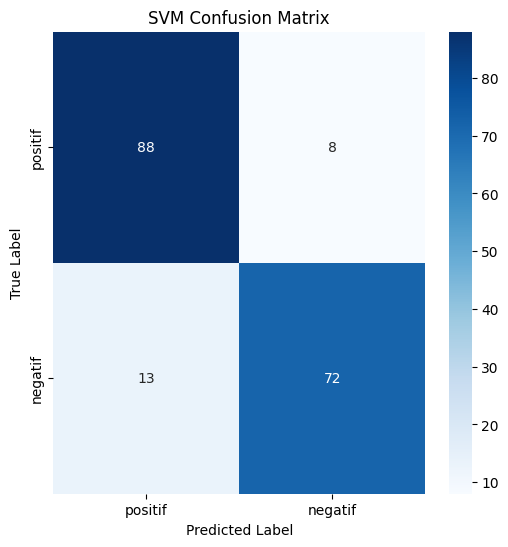

In [35]:
def plt_confusion_matrix(model_name,y_true,y_pred):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
               xticklabels=['positif', 'negatif'],
               yticklabels=['positif','negatif'])

    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plt_confusion_matrix("SVM", y_test, predict)

<ipython-input-36-1015749602>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


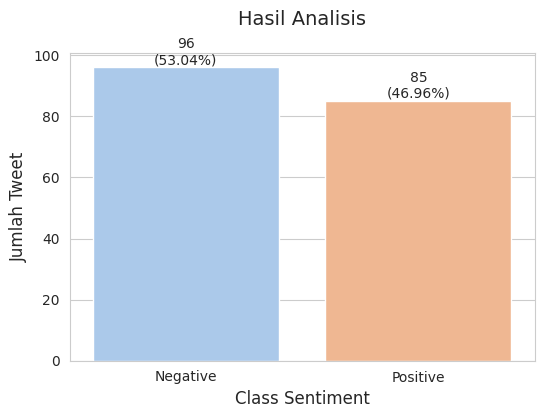

In [36]:
sentiment_count = pd.Series.value_counts(y_test)
sns.set_style('whitegrid')

fig,ax = plt.subplots(figsize=(6,4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Hasil Analisis', fontsize = 14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = sentiment_count.sum()

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()